In [1]:
from ultralytics import YOLO

In [2]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:30<00:00, 1.72MB/s]


In [4]:
results = model.predict("cat_dog.jpg")


image 1/1 /Users/davidhdz/Documents/repos/applewatch/cat_dog.jpg: 448x640 1 cat, 1 dog, 1719.8ms
Speed: 3.6ms preprocess, 1719.8ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


In [5]:
result = results[0]

In [8]:
len(result.boxes)

2

In [10]:
box = result.boxes[0]
print("Object type:", box.cls)
print("Coordinates:", box.xyxy)
print("Probability:", box.conf)

print("Object type:",box.cls[0])
print("Coordinates:",box.xyxy[0])
print("Probability:",box.conf[0])

Object type: tensor([16.])
Coordinates: tensor([[261.1693,  94.3466, 460.5358, 313.0111]])
Probability: tensor([0.9527])
Object type: tensor(16.)
Coordinates: tensor([261.1693,  94.3466, 460.5358, 313.0111])
Probability: tensor(0.9527)


In [13]:
cords = box.xyxy[0].tolist()
cords = [round(x) for x in cords]
class_id = result.names[box.cls[0].item()]
conf = round(box.conf[0].item(), 2)
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: dog
Coordinates: [261, 94, 461, 313]
Probability: 0.95


In [16]:
# Printing all the detected objects

for box in result.boxes:
    print("------------------------------------")
    class_id = result.names[box.cls[0].item()]
    cords = [round(x) for x in box.xyxy[0].tolist()]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("------------------------------------")

------------------------------------
Object type: dog
Coordinates: [261, 94, 461, 313]
Probability: 0.95
------------------------------------
------------------------------------
Object type: cat
Coordinates: [140, 170, 256, 316]
Probability: 0.92
------------------------------------


In [17]:
def print_box(box):
    class_id, cords, conf = box
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

[
    print_box([
        result.names[box.cls[0].item()],
        [round(x) for x in box.xyxy[0].tolist()],
        round(box.conf[0].item(), 2)
    ]) for box in result.boxes
]

Object type: dog
Coordinates: [261, 94, 461, 313]
Probability: 0.95
---
Object type: cat
Coordinates: [140, 170, 256, 316]
Probability: 0.92
---


[None, None]

In [19]:
result.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [ ]:
# For training speed purposes, I trained this model using Google Colab (GPU).
# This is the notebook: https://colab.research.google.com/drive/1_nb5THAR8Jlrl8kKJHs38QLnbKpf0I_E?usp=sharing
# Once trained, I exported the model to ONNX format and downloaded it. The file is called "best.onnx"
model.train(data="./data/data.yaml", epochs=100)

In [1]:
import onnxruntime as ort

In [2]:
model = ort.InferenceSession("best.onnx", providers="CPUExecutionProvider")

EP Error Unknown Provider Type: C when using CPUExecutionProvider
Falling back to ['CPUExecutionProvider'] and retrying.


/Users/davidhdz/Documents/repos/applewatch/.venv/lib/python3.11/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'C' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(
/Users/davidhdz/Documents/repos/applewatch/.venv/lib/python3.11/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'P' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(
/Users/davidhdz/Documents/repos/applewatch/.venv/lib/python3.11/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'U' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(
/Users/davidhdz/Documents/repos/applewatch/.venv/lib/python3.11/site-packages/onnxruntime/capi/onnxruntime_inference_collection

In [4]:
inputs = model.get_inputs()
len(inputs)

1

In [6]:
input = inputs[0]
print("Name:",input.name)
print("Type:",input.type)
print("Shape:",input.shape)


Name: images
Type: tensor(float)
Shape: [1, 3, 640, 640]


In [7]:
from PIL import Image

In [24]:
img = Image.open("rotten_fresh_apple.jpeg")
img_width, img_height = img.size
img = img.resize((640, 640))

In [25]:
# Removing alpha channel
img = img.convert("RGB")

In [26]:
import numpy as np

In [38]:
input = np.array(img, dtype=np.float32)

In [39]:
input.shape

(640, 640, 3)

In [40]:
# Fix dimensions order
input = np.transpose(input, (2, 0, 1))
input.shape

(3, 640, 640)

In [41]:
input = input.reshape(1, 3, 640, 640)
input[0, 0, 0,0]

255.0

In [42]:
# Scaling in the range 0-1
input = input/255.0
input[0,0,0,0]

1.0

In [43]:
# Running the model
outputs = model.get_outputs()
output = outputs[0]
print("Name:",output.name)
print("Type:",output.type)
print("Shape:",output.shape)

Name: output0
Type: tensor(float)
Shape: [1, 6, 8400]


array([[[[1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         ...,
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.]],

        [[1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         ...,
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.]],

        [[1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         ...,
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.]]]])

In [44]:
outputs = model.run(["output0"], {"images": input})

In [45]:
len(outputs)

1

In [46]:
# Process the output
output = outputs[0]
output.shape

(1, 6, 8400)

In [48]:
output = output[0]
output.shape

(6, 8400)

In [49]:
output = output.transpose()
output.shape

(8400, 6)

In [50]:
row = output[0]
print(row)

[ 5.8348713e+00 -4.4458046e+00  9.5626587e+01  6.4211922e+01
  0.0000000e+00  1.1920929e-07]


In [53]:
xc, yc, w, h = row[0:4]

# Calculate coordinates of bounding corners
x1 = xc-w/2
y1 = yc-h/2
x2 = xc+w/2
y2 = yc+h/2

# Scale to original image size
x1 = (xc - w/2) / 640 * img_width
y1 = (yc - h/2) / 640 * img_height
x2 = (xc + w/2) / 640 * img_width
y2 = (yc + h/2) / 640 * img_height

In [54]:
# Find the object with a maximum probability.

prob = row[4:].max()
class_id = row[4:].argmax()

print(prob, class_id)

1.1920929e-07 1


In [55]:
model_classes = ["Rotten Apple", "Fresh Apple"]

In [56]:
label = model_classes[class_id]
label

'Fresh Apple'

In [57]:
def parse_row(row):
    xc, yc, w, h = row[0:4]
    x1 = (xc - w/2) / 640 * img_width
    y1 = (yc - h/2) / 640 * img_height
    x2 = (xc + w/2) / 640 * img_width
    y2 = (yc + h/2) / 640 * img_height
    prob = row[4:].max()
    class_id = row[4:].argmax()
    label = model_classes[class_id]
    return [x1, y1, x2, y2, label, prob]

In [58]:
boxes = [row for row in [parse_row(row) for row in output] if row[5] > 0.5]
len(boxes)

20

In [59]:
boxes

[[33.01204490661621,
  22.131724548339843,
  283.05837535858154,
  365.41574707031253,
  'Rotten Apple',
  0.8878765],
 [328.79591674804686,
  12.004524993896483,
  575.9490715026856,
  372.6477767944336,
  'Fresh Apple',
  0.8917446],
 [33.57307720184326,
  42.11298580169677,
  283.4394687652588,
  360.8504373550415,
  'Rotten Apple',
  0.87483597],
 [33.16329746246338,
  26.096761322021482,
  283.2861442565918,
  363.91588668823243,
  'Rotten Apple',
  0.88393015],
 [33.52536392211914,
  21.806904602050782,
  283.4077182769775,
  364.9233421325684,
  'Rotten Apple',
  0.8682873],
 [329.38130178451536,
  17.90416259765625,
  576.1057374000549,
  371.0084243774414,
  'Fresh Apple',
  0.91449106],
 [328.4995399475098,
  14.426433563232422,
  575.5266265869141,
  371.1063606262207,
  'Fresh Apple',
  0.9083322],
 [328.81984634399413,
  13.292404174804688,
  577.22848777771,
  371.8296569824219,
  'Fresh Apple',
  0.89667726],
 [33.58025608062744,
  49.97219467163086,
  283.6930932998657,

In [60]:
from PIL import ImageDraw

In [64]:
img = Image.open("rotten_fresh_apple.jpeg")
draw = ImageDraw.Draw(img)

In [71]:
for box in boxes:
    x1, y1, x2, y2, label, prob = box
    draw.rectangle((x1,y1,x2,y2),None,"#00ff00")
    draw.text((x1, y1), label, fill="#00ff00")  

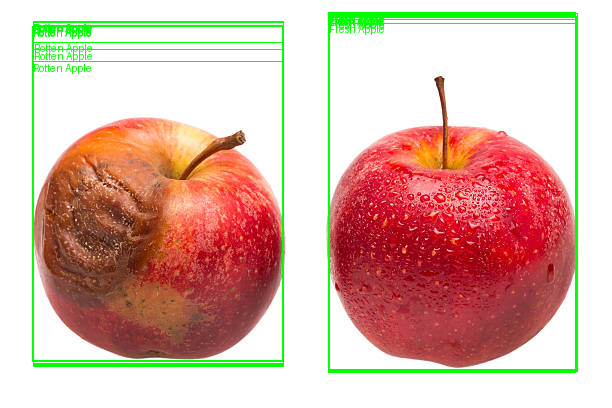

In [72]:
img